# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

At this project we try to scrap job offer posted in Kalibrr Indonesia. Kalibrr was founded to revolutionize the way candidates find career and companies hire talent. We will try to scrap this sites for educational purpose only.

Kalibrr is a good option to find information about the job the company is looking for, especially in IT inudstry. Let's say we want to know the distribution of professions related to 'data' in Indonesia. To do that we need to have the data, and scrapping is a good way to collect the data we don't have from public.

We will scrap 5 points from this sites. 
- Job Title
- Location
- Post date
- Applicant Due Date
- Company

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method. Here we want to take the data from several pages to enrich the information.

In [2]:
import requests

url_gets = [] 
n_of_pages = 15 # number of pages to scrap
for i in range (1, n_of_pages+1):
    url_gets.append(requests.get('https://www.kalibrr.id/id-ID/job-board/te/data/'+str(i)))

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get = url_gets[0].content # get the first page
# combine with the rest of pages
for i in range (1, n_of_pages):
    url_get += url_gets[i].content 

url_get[1:500]

b'!DOCTYPE html><html lang="id-ID"><head><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><script type="application/ld+json">{\n    "@context": "https://schema.org",\n    "@type": "WebSite",\n    "url": "https://www.kalibrr.com",\n    "potentialAction": [\n      {\n        "@type": "SearchAction",\n        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",\n        "query-input": "required name=search_term_string"\n      }\n     ]\n  }</script><meta property="o'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get,"html.parser")
soup.prettify()[:500]

'<!DOCTYPE html>\n<html lang="id-ID">\n <head>\n  <meta content="width=device-width" name="viewport"/>\n  <meta charset="utf-8"/>\n  <script type="application/ld+json">\n   {\n    "@context": "https://schema.org",\n    "@type": "WebSite",\n    "url": "https://www.kalibrr.com",\n    "potentialAction": [\n      {\n        "@type": "SearchAction",\n        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",\n        "query-input": "required name=search_term_string"\n      }\n     ]\n  }\n  </scrip'

## Finding the right key to scrap the data & Extracting the right information

Now we should search the lines that we want to use. Let's go to our web page first.

<img src="asset/img1.png">

First we need to spot the content that we're looking for. To know which part of the code refer to that content, we can just move our cusor there, right click, and inspect element. Then we will see something like this.

<img src="asset/img2.png">

From inspect element we know that we need to find the line with class `k-bg-white k-divide-y k-divide-solid k-divide-tertiary-ghost-color` which will give us the content that we need. We can use the `.find()` or `.find_all()` method at our beautifusoup object. Let's also call our object to see what we get.

In [5]:
tables = soup.find_all('div', attrs={'class':'k-bg-white k-divide-y k-divide-solid k-divide-tertiary-ghost-color'})
tables[0].prettify()[1:500]

'div class="k-bg-white k-divide-y k-divide-solid k-divide-tertiary-ghost-color" itemscope="" itemtype="http://schema.org/ItemList">\n <style data-emotion="css 1b4vug6">\n  .css-1b4vug6{grid-template-columns:5rem 1rem auto 1rem max-content;grid-template-rows:auto 0.25rem auto;}\n </style>\n <div class="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6" itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem">\n  <a class="k-bg-white k-flex k-items-center k-'

As we can see from the line we just extract, we get all the content we needed. As for what is div, The `div` tag defines a division or a section in an HTML document. It is easily styled by using the class or id attribute, Any sort of content can be put inside the `div` tag. 
    
The `find()` function can help you to get you the part of the html code that you needed. While the `find()` fuction method is used for finding out the **first tag** with the specified name or id and returning an **object** of type bs4. The `find_all()` method is used for finding out **all tags** with the specified tag name or id and returning them as a **list** of type bs4.
While most of the html is contained in `div` you can differsiate them with help of `attrs=`, you can insert anything that in the `div` a the attrs to help you find the part you needed. 

Let's check how many object were returned from variable `tables` that we just created. It should be 15 as we're taking 15 pages from the sites

In [6]:
len(tables)

15

Now all the `beautiful soup` part is over. All left to do is doing some programming to extract all the data automaticly. I'll show you how to make looping for extracting the data, but before that let's check how long is our data to help our looping process. We can use any content that represent each job post individually. Here, we will use the line with class `k-col-start-3 k-row-start-1` which represent the `job title`.

<img src="asset/img3.png">

In [7]:
total_row_length = 0
for i in range (len(tables)):
    row = tables[i].find_all('div', attrs={'class':'k-col-start-3 k-row-start-1'})
    row_length = len(row)
    total_row_length += row_length

total_row_length

225

Now, we need to get 5 information. Each of them could be found by: 

- `Job Title` is contained within `div` with "k-col-start-3 k-row-start-1"
- `Location` is contained within `div` with "k-flex k-flex-col md:k-flex-row"
- `Post date` is contained within `span` with "k-block k-mb-1"
- `Applicant Due Date` is contained within `span` with "k-block k-mb-1"
- `Company` is contained within `span` with "k-inline-flex k-items-center k-mb-1"

We know the length of our data was 225. Here what the looping do to scrap the information: 

- First, we import some libraries in order to manipulate datetime data. 
- We need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make two loop. first loop for the tables and second loop for the individual job post.
- Which we will find all the contents that we need by using the right key for each content.
- We need to do some data manipulation in order to make our data meaningfull.
- Then we will append it as a tuple to our list that we prepared before, 
- every one iteration we will scrap one job post.  

To get the only text information we can add `.text`. Remember you need to only get one information before you use `.text` otherwise it will return error.

In [8]:
import pandas as pd
from dateutil.relativedelta import relativedelta #library to do arithmethic calculation with datetime data

now = pd.Timestamp.now() #get the current time

temp = [] #initiating a tuple
for j in range(len(tables)): #looping through each table
    for i in range(0, row_length): #looping through each job post
        
        #title
        title = tables[j].find_all('div', attrs={'class':'k-col-start-3 k-row-start-1'})[i].text
        
        #location
        location = tables[j].find_all('div', attrs={'class':'k-flex k-flex-col md:k-flex-row'})[i].text
        location = location[ : location.find(',')] #only taking the region field
        
        #date
        date = tables[j].find_all('span', attrs={'class':'k-block k-mb-1'})[i].text #contain info for date posted and due date
        #date posted
        date_posted = date[date.find(' ')+1 : date.find('•')] #only taking the date posted phrase
        #change word 'an' or 'a' to a number (1) 
        if(date_posted[0:2]=='an'):
            date_posted = '1' + date_posted[2:]
        elif(date_posted[0]=='a'):
            date_posted = '1' + date_posted[1:] 
        number = int(date_posted[ : date_posted.find(' ')]) #get the number field
        letter = date_posted[date_posted.find(' ')+1]       #get the first letter field
        if(letter=='d'):   #if it's a day
            date_posted = now - relativedelta(days=number)   #substract the current day with the amount of number field
        elif(letter=='m'): #if it's a month
            date_posted = now - relativedelta(months=number) #substract the current month with the amount of number field
        elif(letter=='h'): #if it's an hour
            date_posted = now - relativedelta(hours=number)  #substract the current hour with the amount of number field
        else:
            print('Error')
        date_posted = str(date_posted.date()) #get only the date field and convert it to a string
        
        #due date
        due_date = date[date.find('before')+7 : ] #only taking the due date phrase
        d = int(due_date[ : due_date.find(' ')])  #get the day field
        months = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 
                  'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
        m = due_date[due_date.find(' ')+1 :]      #get the month field
        m = months[m]                             #change the month abreviation to the according number
        due_date = now + relativedelta(day=d, month=m) #change the current day and month to the specified number
        due_date = str(due_date.date())                #get only the date field and convert it to a string
        
        #company
        company = tables[j].find_all('span', attrs={'class':'k-inline-flex k-items-center k-mb-1'})[i].text

        temp.append((title, location, date_posted, due_date, company))

temp

[('Project Manager', 'Jakarta', '2023-04-03', '2023-06-29', 'PGI Data'),
 ('Network  Security Engineer',
  'Jakarta',
  '2023-04-05',
  '2023-04-19',
  'PGI Data'),
 ('IT System Analyst', 'Jakarta', '2023-03-27', '2023-04-19', 'PGI Data'),
 ('DevOps and Data Engineer',
  'Tangerang Selatan',
  '2023-04-04',
  '2023-05-13',
  'Mobius Digital'),
 ('Data Analytics Manager',
  'Kota Jakarta Barat',
  '2023-04-05',
  '2023-04-29',
  'PT Adicipta Inovasi Teknologi'),
 ('Senior Data Engineer',
  'North Jakarta',
  '2023-04-12',
  '2023-05-30',
  'paper.id'),
 ('Data Entry',
  'South Jakarta',
  '2023-03-30',
  '2023-05-30',
  'PT. Royal Trust'),
 ('Data Quality Analyst',
  'Central Jakarta City',
  '2023-04-03',
  '2023-05-01',
  'Astra Financial'),
 ('Data Scientist',
  'Tangerang Selatan',
  '2023-03-12',
  '2023-05-15',
  'Mobius Digital'),
 ('Data Engineer',
  'South Tangerang',
  '2023-03-23',
  '2023-05-27',
  'PT Global Urban Esensial'),
 ('IOS & Android Developer',
  'Jakarta Barat',


## Creating data frame & Data wrangling

Put the list of tuple into a dataframe and specify each column name.

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns=('title','location','post_date','due_date','company'))
df.head()

,title,location,post_date,due_date,company
0,Project Manager,Jakarta,2023-04-03,2023-06-29,PGI Data
1,Network Security Engineer,Jakarta,2023-04-05,2023-04-19,PGI Data
2,IT System Analyst,Jakarta,2023-03-27,2023-04-19,PGI Data
3,DevOps and Data Engineer,Tangerang Selatan,2023-04-04,2023-05-13,Mobius Digital
4,Data Analytics Manager,Kota Jakarta Barat,2023-04-05,2023-04-29,PT Adicipta Inovasi Teknologi


Do the data cleaning process such as removing duplicates and converting to an appropriate data type.

In [10]:
df = df.drop_duplicates()
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df[['post_date','due_date']] = df[['post_date','due_date']].astype('datetime64[ns]')
df.dtypes

title                object
location             object
post_date    datetime64[ns]
due_date     datetime64[ns]
company              object
dtype: object

Here we want to know the distribution of professions related to 'data' in Indonesia. The `location` column is going to be our main focus. First let's check the concerned column.

In [11]:
print(df['location'].unique())
print(df['location'].nunique())

['Jakarta' 'Tangerang Selatan' 'Kota Jakarta Barat' 'North Jakarta'
 'South Jakarta' 'Central Jakarta City' 'South Tangerang' 'Jakarta Barat'
 'Jakarta Selatan' 'Denpasar' 'Tangerang' 'West Jakarta' 'Jakarta Utara'
 'Jakarta Pusat' 'Kota Jakarta Selatan' 'East Jakarta' 'Surabaya'
 'West Lombok' 'Malang Kota' 'Central Jakarta' 'Kota Jakarta Pusat'
 'Kupang' 'Tabanan' 'Sleman' 'Banjarmasin' 'Bandung Kota' 'Jakarta Timur'
 'Sukabumi City' 'Depok City' 'Jember' 'Makassar' 'Medan'
 'Tangerang Kabupaten' 'Bogor Kota']
34


As you can see from the code above, there was some word that we can remove from the phrase to make our data more general.

In [12]:
df['location'] = df['location'].str.replace('City','')      #remove the word 'City'
df['location'] = df['location'].str.replace('Kota','')      #remove the word 'Kota'
df['location'] = df['location'].str.replace('Kabupaten','') #remove the word 'Kabupaten'
df['location'] = df['location'].str.strip()                 #remove leading and trailing whitespace
print(df['location'].unique())
print(df['location'].nunique())

['Jakarta' 'Tangerang Selatan' 'Jakarta Barat' 'North Jakarta'
 'South Jakarta' 'Central Jakarta' 'South Tangerang' 'Jakarta Selatan'
 'Denpasar' 'Tangerang' 'West Jakarta' 'Jakarta Utara' 'Jakarta Pusat'
 'East Jakarta' 'Surabaya' 'West Lombok' 'Malang' 'Kupang' 'Tabanan'
 'Sleman' 'Banjarmasin' 'Bandung' 'Jakarta Timur' 'Sukabumi' 'Depok'
 'Jember' 'Makassar' 'Medan' 'Bogor']
29


Next, we know that there were two languages used in this data (Bahasa and English). We're gonna translate the English onto the Bahasa.

In [13]:
for i in range(len(df['location'])):
    
    find_whitespace = df['location'][i].find(' ')            #search for the first whitespace
    first_word = df['location'][i][ : find_whitespace]       #take the first word
    remaining_word = df['location'][i][find_whitespace+1 : ] #take the remaining words
    
    region = {'North':'Utara', 'South':'Selatan', 'East':'Timur', 'West':'Barat', 'Central':'Pusat'} #dict mapping English to Bahasa
    region_keys = list(region.keys()) #take the dict key
    
    if first_word in (region_keys): #if the first word was one of the dict key
        fixed_location = remaining_word + ' ' + region[first_word] #take the remaining words and add with the corresponding word
        df['location'][i] = fixed_location  #replace with the new value

C:\Users\tiosy\AppData\Local\Temp\ipykernel_9376\4272086967.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'][i] = fixed_location  #replace with the new value


In [14]:
print(df['location'].unique())
print(df['location'].nunique())

['Jakarta' 'Tangerang Selatan' 'Jakarta Barat' 'Jakarta Utara'
 'Jakarta Selatan' 'Jakarta Pusat' 'Denpasar' 'Tangerang' 'Jakarta Timur'
 'Surabaya' 'Lombok Barat' 'Malang' 'Kupang' 'Tabanan' 'Sleman'
 'Banjarmasin' 'Bandung' 'Sukabumi' 'Depok' 'Jember' 'Makassar' 'Medan'
 'Bogor']
23


Now we get a smaller number of category from the `location` column. The data is ready to be used.

In [15]:
df

,title,location,post_date,due_date,company
0,Project Manager,Jakarta,2023-04-03,2023-06-29,PGI Data
1,Network Security Engineer,Jakarta,2023-04-05,2023-04-19,PGI Data
2,IT System Analyst,Jakarta,2023-03-27,2023-04-19,PGI Data
3,DevOps and Data Engineer,Tangerang Selatan,2023-04-04,2023-05-13,Mobius Digital
4,Data Analytics Manager,Jakarta Barat,2023-04-05,2023-04-29,PT Adicipta Inovasi Teknologi
...,...,...,...,...,...
167,Internship PT BFI Finance Indonesia Tbk,Tangerang,2023-03-30,2023-06-29,PT BFI Finance Indonesia Tbk
168,Accounting (Project Based) PT Fasen Creative Q...,Jakarta Barat,2023-04-03,2023-04-29,Kompas Gramedia
169,BFI Finance X Arkavidia - Data Analyst,Tangerang,2023-02-12,2023-12-30,PT BFI Finance Indonesia Tbk
170,IT Security Architect,Jakarta Selatan,2023-02-12,2023-04-29,Asuransi Astra


We can create a simple data visualisation. Let's try to see the number of jobs by location to find out which cities having the most job vacancy. First we need to prepare the required data.

In [17]:
df['location'].value_counts().head(10)

Jakarta Selatan      44
Jakarta              24
Jakarta Pusat        21
Jakarta Barat        18
Tangerang            15
Jakarta Utara        10
Jakarta Timur         8
Tangerang Selatan     7
Surabaya              6
Bandung               5
Name: location, dtype: int64

In [18]:
viz = pd.crosstab(
    index=df['location'],
    columns='count',
    colnames=' ',
).sort_values(by='count',ascending=False).head(10)

Then we can use a plot to see our data. Select the best plot to describe your data by changing the `kind` value. 

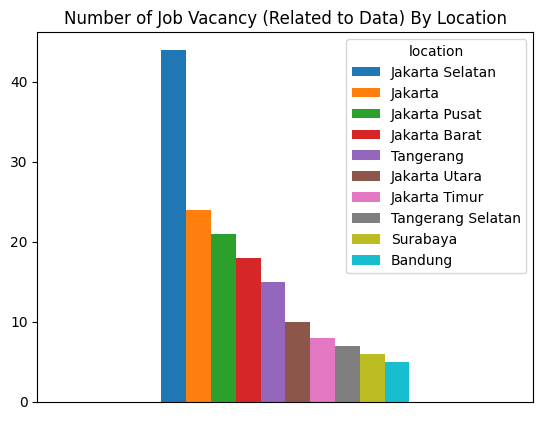

In [19]:
viz.T.plot(
    kind='bar', 
    title='Number of Job Vacancy (Related to Data) By Location',
    xticks=[],
);

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

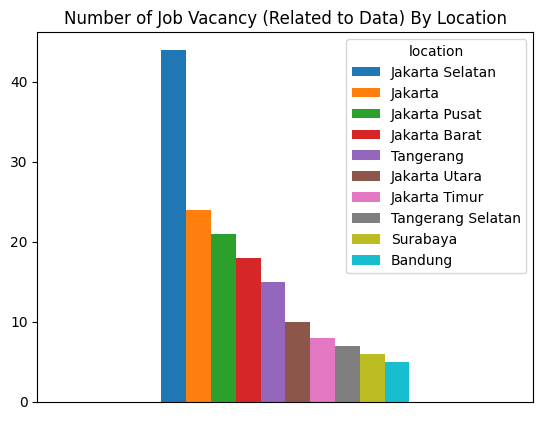

In [20]:
viz.T.plot(
    kind='bar', 
    title='Number of Job Vacancy (Related to Data) By Location',
    xticks=[],
);

From the chart above, we can take several conclusion:
- Jakarta Selatan is the city having the most job vacancies (related to 'Data').
- Jakarta is the province having the most job vacancies (related to 'Data').
- Most of the job vacancies (related to 'Data') are located in java island. 

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.